In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("trade_customs_dataset.csv")
df

,Shipment_ID,Origin_Country,Destination_Country,Shipment_Date,Estimated_Arrival_Date,Actual_Arrival_Date,Transport_Mode,Carrier_Name,Route_Code,Commodity_Type,...,HS_Code,Document_Status,Compliance_Score,Prior_Offense_Count,Tariff_Category,Route_Risk_Index,Inspection_Type,Delay_Reason,Customs_Delay_Days,Risk_Flag
0,SHP000001,India,China,2022-01-31,2022-02-12,2022-02-15,Air,Carrier_9,R854,Electronics,...,9935.21,Error,0.49,3,Low,0.16,Physical,"Incomplete paperwork, requires manual review",3,1
1,SHP000002,Germany,Brazil,2024-08-31,2024-09-24,2024-09-25,Sea,Carrier_36,R303,Machinery,...,9928.63,Complete,0.76,3,High,0.71,Document,Routine customs clearance without issue,1,1
2,SHP000003,China,Germany,2023-09-28,2023-10-13,2023-10-13,Road,Carrier_10,R320,Automotive,...,2674.21,Missing,0.58,0,Medium,0.52,Document,Incorrect HS code classification,0,0
3,SHP000004,Brazil,China,2024-02-25,2024-03-18,2024-03-21,Sea,Carrier_25,R180,Food,...,5803.90,Error,0.77,2,High,0.14,Physical,"Suspected undervaluation, needs reassessment",3,1
4,SHP000005,India,China,2021-07-22,2021-08-20,2021-08-20,Road,Carrier_6,R975,Pharmaceuticals,...,2654.58,Missing,0.52,3,High,0.51,Document,High-risk commodity flagged for inspection,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SHP009996,Japan,India,2023-03-24,2023-04-16,2023-04-16,Rail,Carrier_34,R839,Electronics,...,8092.75,Missing,0.57,2,Medium,0.82,Physical,"Incomplete paperwork, requires manual review",0,0
9996,SHP009997,South Africa,India,2024-02-22,2024-03-02,2024-03-05,Air,Carrier_48,R271,Pharmaceuticals,...,2514.56,Error,0.91,3,High,0.61,Document,Random inspection selected,3,1
9997,SHP009998,USA,Brazil,2020-07-21,2020-08-12,2020-08-15,Sea,Carrier_9,R635,Pharmaceuticals,...,2708.74,Missing,0.70,2,Medium,0.81,Document,Routine customs clearance without issue,3,1
9998,SHP009999,Australia,Brazil,2020-08-10,2020-09-08,2020-09-10,Road,Carrier_50,R617,Pharmaceuticals,...,3055.95,Missing,0.96,2,High,0.34,Document,Routine customs clearance without issue,2,1


In [61]:
df.columns

Index(['Shipment_ID', 'Origin_Country', 'Destination_Country', 'Shipment_Date',
       'Estimated_Arrival_Date', 'Actual_Arrival_Date', 'Transport_Mode',
       'Carrier_Name', 'Route_Code', 'Commodity_Type', 'Declared_Value_USD',
       'Weight_kg', 'HS_Code', 'Document_Status', 'Compliance_Score',
       'Prior_Offense_Count', 'Tariff_Category', 'Route_Risk_Index',
       'Inspection_Type', 'Delay_Reason', 'Customs_Delay_Days', 'Risk_Flag'],
      dtype='object')

<Axes: >

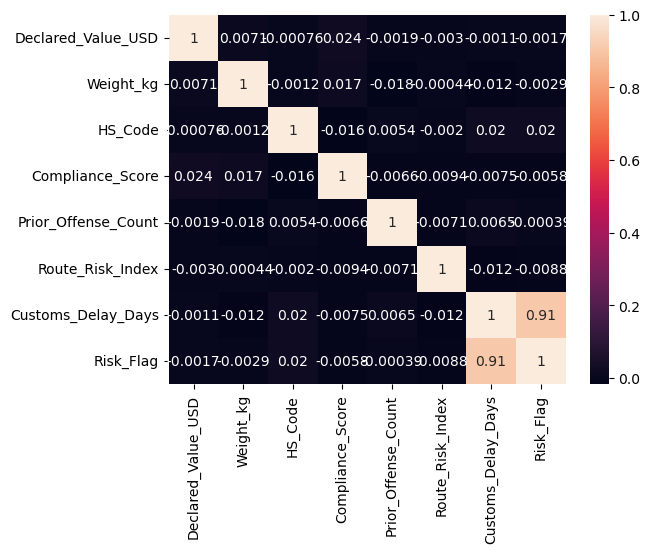

In [62]:
sns.heatmap(df.corr(numeric_only= True), annot= True)

In [63]:
df = df.drop_duplicates()

In [64]:
# Droping unwanted columns
cols = ['Origin_Country', 'Destination_Country', 'Transport_Mode', 'Commodity_Type', 'Declared_Value_USD', 'Weight_kg', 'Compliance_Score', 'Route_Risk_Index','Risk_Flag']
df = df[cols]

In [65]:
df

,Origin_Country,Destination_Country,Transport_Mode,Commodity_Type,Declared_Value_USD,Weight_kg,Compliance_Score,Route_Risk_Index,Risk_Flag
0,India,China,Air,Electronics,36867.70,3013.36,0.49,0.16,1
1,Germany,Brazil,Sea,Machinery,3846.10,4337.57,0.76,0.71,1
2,China,Germany,Road,Automotive,9909.42,957.85,0.58,0.52,0
3,Brazil,China,Sea,Food,22165.31,1491.58,0.77,0.14,1
4,India,China,Road,Pharmaceuticals,23347.43,3936.62,0.52,0.51,0
...,...,...,...,...,...,...,...,...,...
9995,Japan,India,Rail,Electronics,44713.49,2953.99,0.57,0.82,0
9996,South Africa,India,Air,Pharmaceuticals,1802.01,3781.63,0.91,0.61,1
9997,USA,Brazil,Sea,Pharmaceuticals,37810.97,3892.04,0.70,0.81,1
9998,Australia,Brazil,Road,Pharmaceuticals,2543.20,144.58,0.96,0.34,1


In [66]:
df.isna().sum()

Origin_Country         0
Destination_Country    0
Transport_Mode         0
Commodity_Type         0
Declared_Value_USD     0
Weight_kg              0
Compliance_Score       0
Route_Risk_Index       0
Risk_Flag              0
dtype: int64